## Week 10

In [ ]:
#select a subset of data to work with
joined_drop=joined_drop[["sku","stype","style","retail","standardized_color","standardized_size","vendor","brand","packsize"]]
joined_drop.head(10)

,sku,stype,style,retail,standardized_color,standardized_size,vendor,brand,packsize
144,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
145,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
146,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921
168,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
169,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
170,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
171,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
172,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
173,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921
174,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921


In [ ]:
joined_drop.shape

(31074, 9)

In [ ]:
# Calculate the count of 'R' in 'stype' for each 'sku'
r_count = joined_drop[joined_drop['stype'] == 'R'].groupby('sku').size()

# Calculate the total count for each 'sku'
total_count = joined_drop.groupby('sku').size()

# Compute the return rate
return_rate = round(r_count*100 / total_count,2)

# Convert return_rate to a DataFrame
return_rate_df = return_rate.reset_index().rename(columns={0: 'return_rate(%)'})

# Merge the return rate back into the original DataFrame
joined_drop = joined_drop.merge(return_rate_df, on='sku', how='left')

# Fill NaN values with 0 if there are skus without 'R' in 'stype'
joined_drop['return_rate(%)'].fillna(0, inplace=True)

# Display the first 10 rows
joined_drop.head(20)

,sku,stype,style,retail,standardized_color,standardized_size,vendor,brand,packsize,return_rate(%)
0,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
1,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
2,1048635,P,8F30G61,-0.362679,Other,Other,2067178,WESTPOIN,1.804921,0.00
3,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
4,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
5,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
6,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
7,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
8,1058635,R,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44
9,1058635,P,8F30G61,-0.660968,Other,Other,2067178,WESTPOIN,1.804921,44.44


In [ ]:
#remove duplicate entries
newdf = joined_drop.groupby('sku').agg({
    'return_rate(%)': 'mean', 
    'style': 'first', 
    'retail': 'mean', 
    'standardized_color': 'first', 
    'standardized_size': 'first', 
    'vendor': 'first', 
    'brand': 'first', 
    'packsize': 'mean'
}).reset_index()
newdf

,sku,return_rate(%),style,retail,standardized_color,standardized_size,vendor,brand,packsize
0,7915,3.45,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973
1,9633,8.45,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973
2,9951,0.00,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973
3,10896,0.00,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973
4,17915,9.52,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973
...,...,...,...,...,...,...,...,...,...
1960,9990073,0.00,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902
1961,9992306,0.00,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992
1962,9999170,10.34,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973
1963,9999683,0.00,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902


In [ ]:
newdf["return_rate(%)"].describe()

count    1965.000000
mean        7.046148
std        16.352937
min         0.000000
25%         0.000000
50%         0.000000
75%         6.250000
max       100.000000
Name: return_rate(%), dtype: float64

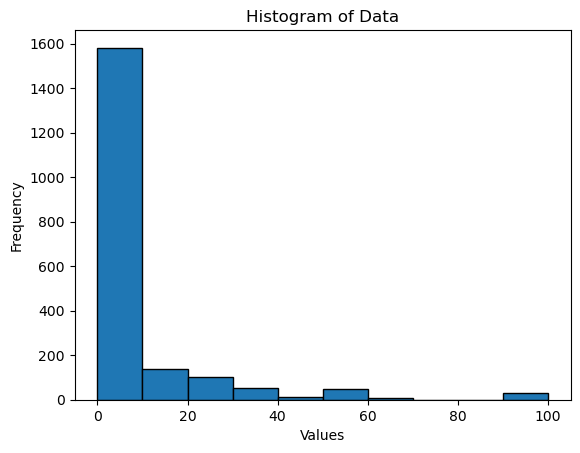

In [ ]:
plt.hist(newdf["return_rate(%)"], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [ ]:
#if the return rate is greater than or equal to 0.6, then it is very likely to be returned
#if not, then the product is more prone to be purchased. 
def categorize_product(return_rate):
    if return_rate >= 0.6:
        return "R"
    else:
        return "P"

In [ ]:
newdf['Predict P or R'] = newdf['return_rate(%)'].apply(categorize_product)
newdf

,sku,return_rate(%),style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,7915,3.45,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
1,9633,8.45,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973,R
2,9951,0.00,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973,P
3,10896,0.00,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973,P
4,17915,9.52,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
...,...,...,...,...,...,...,...,...,...,...
1960,9990073,0.00,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902,P
1961,9992306,0.00,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992,P
1962,9999170,10.34,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973,R
1963,9999683,0.00,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902,P


In [ ]:
#remove the return rate column and keep just features and predicted y
newdf.drop('return_rate(%)', axis=1, inplace=True)
newdf

,sku,style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,7915,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
1,9633,689U,0.581901,Other,Other,5511283,CLINIQUE,-0.141973,R
2,9951,635P,-0.263250,Black,Other,5511283,CLINIQUE,-0.141973,P
3,10896,60QH,0.184183,Other,Other,5511283,CLINIQUE,-0.141973,P
4,17915,649G,0.283613,Other,Other,5511283,CLINIQUE,-0.141973,R
...,...,...,...,...,...,...,...,...,...
1960,9990073,R246,0.333327,Other,Other,9520439,CABERNET,-1.439902,P
1961,9992306,10Y25UR1,-1.058686,White,3XL,7016341,MAIN KNI,0.506992,P
1962,9999170,608E,0.084754,White,Other,5511283,CLINIQUE,-0.141973,R
1963,9999683,R246,0.333327,Brown,Other,9520439,CABERNET,-1.439902,P


In [ ]:
# Find the number of NaN values in each column
nas_per_column = newdf.isna().sum()
nas_per_column

sku                   0
style                 0
retail                0
standardized_color    0
standardized_size     0
vendor                0
brand                 0
packsize              0
Predict P or R        0
dtype: int64

In [ ]:
#do one hot encoding for style, standardized_color, standardized_size,vendor, and brand
newdf_encoded = pd.get_dummies(newdf, columns=[
    'style', 'standardized_color', 'standardized_size', 'vendor', 'brand'])
newdf_encoded = newdf_encoded * 1
newdf_encoded

,sku,retail,packsize,Predict P or R,style_006U64012,style_00Y25UR1,style_01Y25UR1,style_0589,style_064115184,style_0F30G87,...,brand_MAIN KNI,brand_MILCO IN,brand_NOBILITY,brand_NOBLE CH,brand_NOBLE EX,brand_ROCHESTE,brand_ROUNDTRE,brand_TOMMY HI,brand_TROPICAL,brand_WESTPOIN
0,7915,0.283613,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9633,0.581901,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9951,-0.263250,-0.141973,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10896,0.184183,-0.141973,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17915,0.283613,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,9990073,0.333327,-1.439902,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,9992306,-1.058686,0.506992,P,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1962,9999170,0.084754,-0.141973,R,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,9999683,0.333327,-1.439902,P,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check values
newdf_encoded[newdf_encoded["style_00Y25UR1"] == 1]

,sku,retail,packsize,Predict P or R,style_006U64012,style_00Y25UR1,style_01Y25UR1,style_0589,style_064115184,style_0F30G87,...,brand_MAIN KNI,brand_MILCO IN,brand_NOBILITY,brand_NOBLE CH,brand_NOBLE EX,brand_ROCHESTE,brand_ROUNDTRE,brand_TOMMY HI,brand_TROPICAL,brand_WESTPOIN
1900,9692306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1902,9702306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1904,9712306,-0.859827,0.506992,R,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
# Replace 'class_column' with the actual name of your target column
X = newdf_encoded.drop(['Predict P or R',"sku"], axis=1)
y = newdf_encoded['Predict P or R']

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")


# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

[[189  77]
 [ 53  74]]


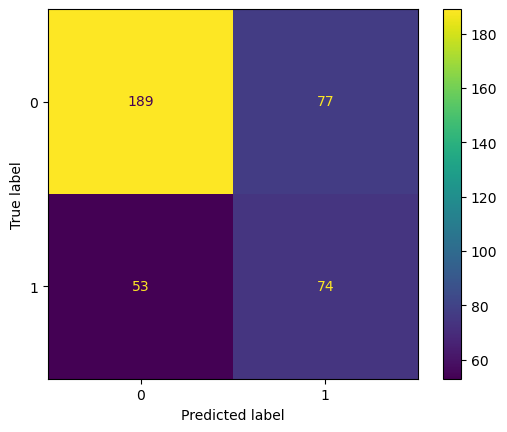

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
# Assume y_test are the true labels and y_pred are the model's predictions
# y_test = [...]
# y_pred = [...]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# For a nicer display
ConfusionMatrixDisplay(cm).plot()

# If you're using Jupyter Notebook or similar, you might need to add this to display the plot:
import matplotlib.pyplot as plt
plt.show()


In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.78      0.71      0.74       266
           R       0.49      0.58      0.53       127

    accuracy                           0.67       393
   macro avg       0.64      0.65      0.64       393
weighted avg       0.69      0.67      0.68       393

Accuracy: 0.6692111959287532
